In [17]:
%load_ext autoreload
%autoreload 2
%cd ~/dev/neurad-studio

/home/s0001900/dev/neurad-studio


In [18]:
from nerfstudio.generative.dynamic_dataset import DynamicDataset, NeuRADInfoGetter, RGBDataGetter
from nerfstudio.generative.utils import show_img
from pathlib import Path

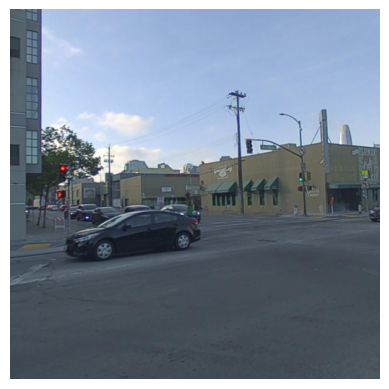

In [175]:


dataset = DynamicDataset.from_config({
    "dataset": "pandaset",
    "path": "data/pandaset/",
    "data_getters": {
        "rgb": {
            "camera": "front_left_camera",
        },

        "meta": {},
        "cn_ray_6_front_left_camera": {}
    },
    "data_tree": {
        "pandaset": {
            "001": "::"
        }
    }
})

import torchvision.transforms.v2 as tvtf
batch = dataset[0]
ex_img = tvtf.Compose((tvtf.CenterCrop((1024, 1024)), tvtf.Resize((512, 512), antialias=True)))(batch["rgb"])
show_img(ex_img)

torch.Size([1, 3, 512, 512])


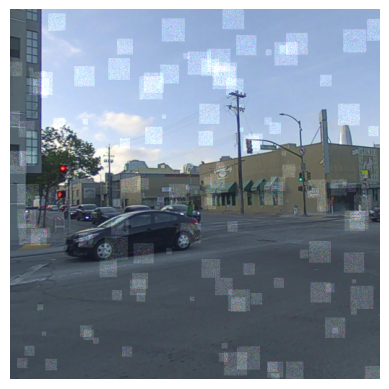

In [254]:
import typing
from typing import Optional
import torch
from torch import Tensor

from nerfstudio.generative.diffusion_model import generate_noise_pattern
from nerfstudio.generative.utils import batch_if_not_iterable




pattern = generate_noise_pattern(256, 2, 16, noise_strength=0.2, pattern=ex_img)
print(pattern.shape)
show_img(pattern[0])

In [ ]:
ex_img + 